### 1 - Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import confusion_matrix
import itertools

### 2 - Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
x_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


### 3 - Preprocessing of Data

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
## değerlerin 0 ile 1 arasına ölçeklendirilmesini sağlar.
y_train, y_test = y_train.flatten(), y_test.flatten()
## bu işlem onları tek boyutlu bir diziye dönüştürür
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000,)
x_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000,)


#### Number of Classes

In [5]:
K = len(set(y_train))
print(f'Number of Classes : {K}')

Number of Classes : 10


### 4 - Build the model using Functional API

In [6]:
i = Input(shape = x_train[0].shape)
x = Conv2D(filters = 32, kernel_size = (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(filters = 64, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (3, 3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(units = 128, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(units = K, activation = 'softmax')(x)

model = Model(i, x)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dropout (Dropout)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               147584

### Compile and Fit

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 32, verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 20s 5ms/step - loss: 1.5761 - accuracy: 0.4251 - val_loss: 1.2649 - val_accuracy: 0.5469
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2482 - accuracy: 0.5523 - val_loss: 1.1225 - val_accuracy: 0.6003
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1060 - accuracy: 0.6082 - val_loss: 1.0245 - val_accuracy: 0.6354
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0057 - accuracy: 0.6429 - val_loss: 1.0241 - val_accuracy: 0.6379
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9264 - accuracy: 0.6710 - val_loss: 0.9326 - val_accuracy: 0.6713
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8682 - accuracy: 0.6927 - val_loss: 0.9231 - val_accuracy: 0.6754
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8140 - accuracy: 0.7111 - val_loss: 0.8888 - val_accuracy

### 5 - Plotting model results


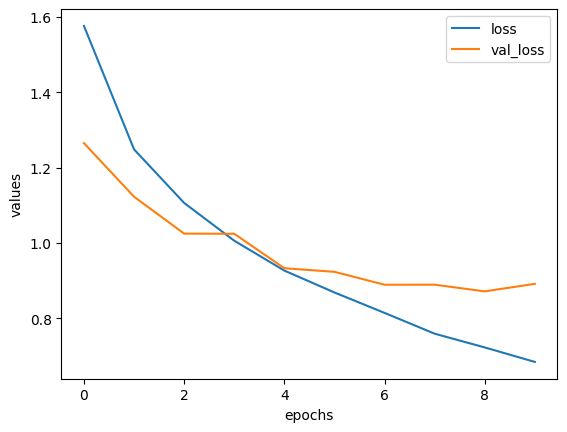

In [9]:
### Loss plot
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

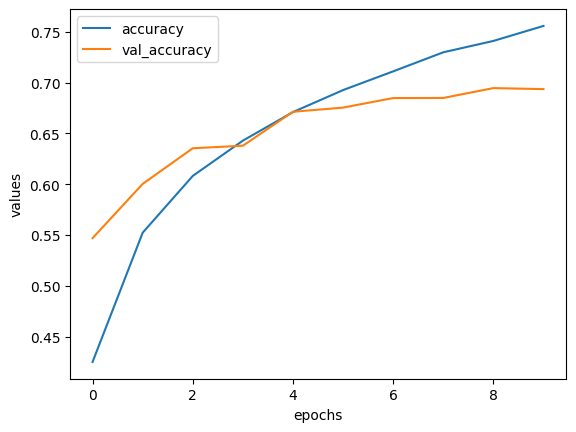

In [11]:
### Accuracy plot
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

### Plot the confusion_matrix

313/313 [==============================] - 1s 2ms/step
confusion matrix, without normalization
[[766  18  48  10  10   2  10  12 100  24]
 [ 14 826  19   2   1   2  18   1  45  72]
 [ 80   4 626  50  80  36  67  32  19   6]
 [ 27  11 128 448  72 128 110  36  25  15]
 [ 24   4 124  38 627  21  85  55  20   2]
 [ 13   9  94 194  61 488  46  65  22   8]
 [ 12   8  61  39  29  11 824   5   9   2]
 [ 18   7  56  30  78  36   9 752   3  11]
 [ 58  25  14  10   8   3   7   6 852  17]
 [ 42 115  21  10   1   3  16  22  43 727]]
---------------------------------------------


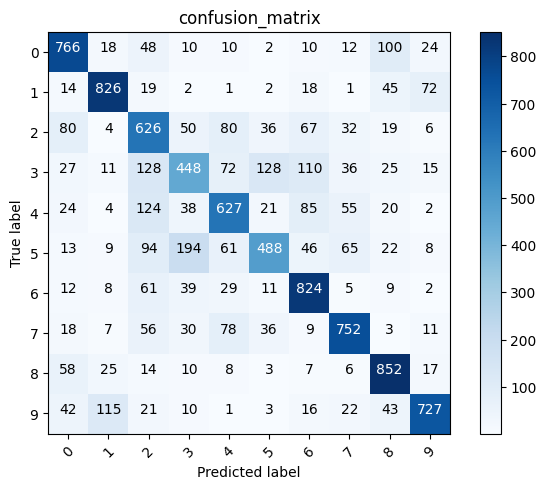

In [16]:
def plot_conf_matrix(cm, classes, normalize = False, title = 'confusion_matrix', cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')

  else:
    print('confusion matrix, without normalization')

  print(cm)
  print("---------------------------------------------")
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_conf_matrix(cm, list(range(10)))


### Label mapping

In [17]:
labels = '''
Airplane_(Uçak)
Automobile_(Otomobil)
Bird_(Kuş)
Cat_(Kedi)
Deer_(Geyik)
Dog_(Köpek)
Frog_(Kurbağa)
Horse_(At)
Ship_(Gemi)
Truck_(Kamyon)'''.split()

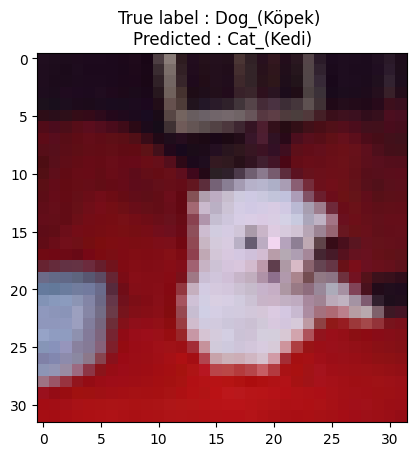

In [20]:
## show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, -1), cmap = 'gray')
plt.title('True label : %s \nPredicted : %s' % (labels[y_test[i]], labels[p_test[i]]));


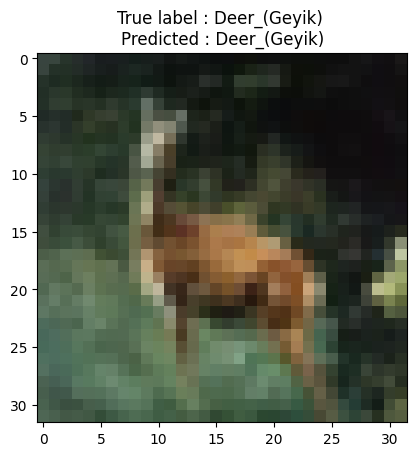

In [21]:
## show some classified examples
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, -1), cmap = 'gray')
plt.title('True label : %s \nPredicted : %s' % (labels[y_test[i]], labels[p_test[i]]));

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8912 - accuracy: 0.6936


[0.8911706805229187, 0.6935999989509583]